<a href="https://colab.research.google.com/github/Chandu-9-9/FUTURE_ML_01/blob/main/sales_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI-Powered Sales Forecasting Dashboard

## Objective
This project analyzes historical retail sales data and builds a time-series
forecasting model to predict future sales trends.

## Tools Used
- Python
- Pandas
- Matplotlib
- ARIMA Time Series Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.isnull().sum()


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df = df[['Order Date', 'Sales']]
df.head()


,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,6/12/2016,14.6200
3,10/11/2015,957.5775
4,10/11/2015,22.3680


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.dtypes


,0
Order Date,datetime64[ns]
Sales,float64


In [ ]:
df = df.set_index('Order Date')
df.head()


,Sales
Order Date,
2016-11-08,261.9600
2016-11-08,731.9400
2016-06-12,14.6200
2015-10-11,957.5775
2015-10-11,22.3680


In [ ]:
monthly_sales = df.resample('ME').sum()
monthly_sales.head()


,Sales
Order Date,
2014-01-31,14236.895
2014-02-28,4519.892
2014-03-31,55691.009
2014-04-30,28295.345
2014-05-31,23648.287


In [ ]:
monthly_avg_sales = monthly_sales['Sales'].mean()
monthly_avg_sales


np.float64(47858.35125625)

In [ ]:
monthly_sales['month'] = monthly_sales.index.month
monthly_sales['seasonal_peak'] = monthly_sales['month'].isin([10, 11, 12]).astype(int)
monthly_sales.head()


,Sales,month,seasonal_peak
Order Date,,,
2014-01-31,14236.895,1,0
2014-02-28,4519.892,2,0
2014-03-31,55691.009,3,0
2014-04-30,28295.345,4,0
2014-05-31,23648.287,5,0


In [ ]:
monthly_sales['holiday_spike'] = (monthly_sales['Sales'] > monthly_sales['Sales'].mean()).astype(int)
monthly_sales.head()


,Sales,month,seasonal_peak,holiday_spike
Order Date,,,,
2014-01-31,14236.895,1,0,0
2014-02-28,4519.892,2,0,0
2014-03-31,55691.009,3,0,1
2014-04-30,28295.345,4,0,0
2014-05-31,23648.287,5,0,0


In [ ]:
ts = monthly_sales['Sales']
ts.head()


,Sales
Order Date,
2014-01-31,14236.895
2014-02-28,4519.892
2014-03-31,55691.009
2014-04-30,28295.345
2014-05-31,23648.287


In [ ]:
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
model = ARIMA(ts, order=(1, 1, 1))
model_fit = model.fit()
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -539.895
Date:                Tue, 30 Dec 2025   AIC                           1085.789
Time:                        05:21:16   BIC                           1091.340
Sample:                    01-31-2014   HQIC                          1087.878
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2278      0.262      0.868      0.386      -0.287       0.742
ma.L1         -0.8396      0.140     -5.979      0.000      -1.115      -0.564
sigma2      5.976e+08   6.93e-11   8.63e+18      0.000    5.98e+08    5.98e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 1.06
Prob(Q):                              0.60   Prob(JB):                         0.59
Heteroskedasticity (H):               1.02   Skew:                             0.30
Prob(H) (two-sided):                  0.96   Kurtosis:                         2.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.52e+34. Standard errors may be unstable.
"""

In [ ]:
forecast = model_fit.forecast(steps=6)
forecast


,predicted_mean
2018-01-31,75259.028220
2018-02-28,73306.800169
2018-03-31,72862.101786
2018-04-30,72760.803860
2018-05-31,72737.729188
2018-06-30,72732.473004


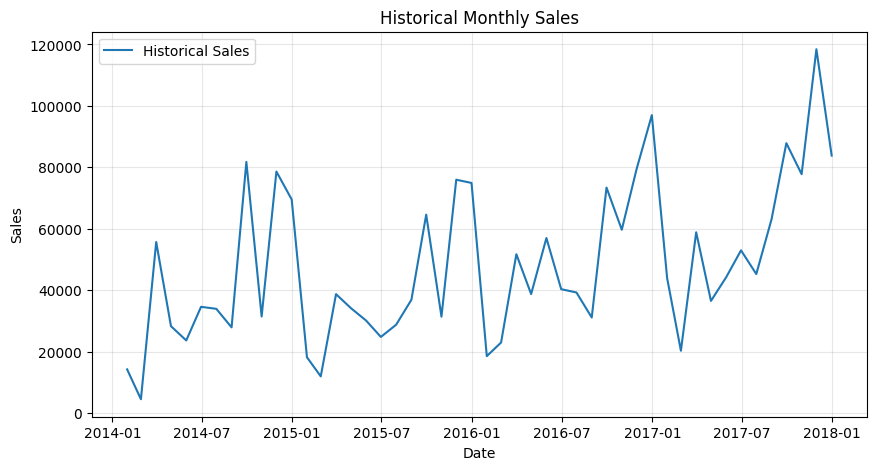

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(ts, label='Historical Sales')
plt.title('Historical Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(alpha=0.3)
plt.legend()
plt.show()


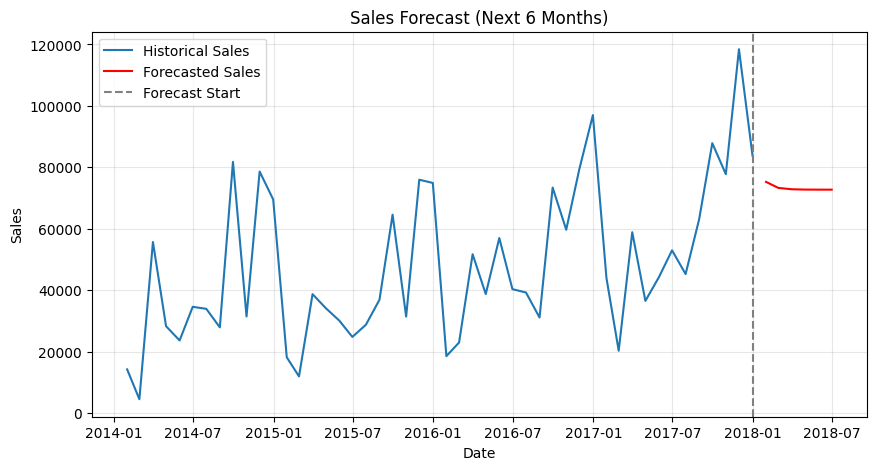

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(ts, label='Historical Sales')
plt.plot(forecast, label='Forecasted Sales', color='red')

# Mark where forecast starts
plt.axvline(ts.index[-1], color='gray', linestyle='--', label='Forecast Start')

plt.title('Sales Forecast (Next 6 Months)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(alpha=0.3)
plt.legend()
plt.show()


## Insights

- Historical sales show clear seasonal trends with higher sales during certain months.
- The ARIMA model was trained on monthly aggregated sales data.
- The forecast predicts relatively stable sales for the next six months.
- These predictions can help businesses plan inventory and marketing strategies.
